# What I am trying to find out

In my opinion one of the most important questions is the general Happiness in Life and how does it correlate to external factors. So I tried to have a look at three relationships according to happiness.

How does happiness relate to trust into the political and legal system.

# The Dataset(s)

As a basis I used a dataset of the ESS (European Social Studies) which questions people all over Europe. The same questions where asked  between 2002 and 2018 every two years. I took all countries into account that participated in every study, which are Belgium, Finland, France, Germany, Hungary, Ireland, Netherlands, Norway, Poland, Portugal, Slovenia, Spain, Sweden, Switzerland, Uk.

Two have comparisons between the countries, also the annual GDP per capita und inflation rate were taken into account.

ESS from https://www.europeansocialsurvey.org/downloadwizard/

GDP per Capita: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?end=2020&start=2003&view=map

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from import_prep import file_importer

# Importing the data using the importer and preprocessor

list_of_countries = ['Belgium', 'Finland', 'France', 'Germany', 'Hungary', 'Ireland', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']

ess_pp1, gdp_data, gdp_growth_data, infl, gini = file_importer(list_of_countries)

At first I will have a look at the number of people who answered the questions and the general distribution of there answers considering the trust into different institutions.

In [42]:
# Drop rows that did not contain a valid answer

ess_trust = ess_pp1.drop(ess_pp1[(ess_pp1['Trust parliament'] > 10) | (ess_pp1['Trust Legal'] > 10) |
                              (ess_pp1['Trust police'] > 10) | (ess_pp1['Trust politicians'] > 10) | 
                              (ess_pp1['Trust parties'] > 10) | (ess_pp1['Trust EU'] > 10) | (ess_pp1['Left Right'] > 10)].index)

ess_trust_and_income_4_9 = ess_pp1.drop(ess_pp1[(ess_pp1['Net income 4-9'] > 10) | (ess_pp1['Trust parliament'] > 10) | 
                                (ess_pp1['Trust Legal'] > 10) | (ess_pp1['Trust police'] > 10) | 
                                (ess_pp1['Trust politicians'] > 10) | (ess_pp1['Trust parties'] > 10) |
                                (ess_pp1['Trust EU'] > 10) | (ess_pp1['Left Right'] > 10)].index).dropna(subset=['Net income 4-9'])

ess_happy = ess_pp1.drop(ess_pp1[ess_pp1['Happiness'] > 10].index)

ess_happy_trust = ess_pp1.drop(ess_pp1[(ess_pp1['Happiness'] > 10) | (ess_pp1['Trust parliament'] > 10) | 
                                (ess_pp1['Trust Legal'] > 10) | (ess_pp1['Trust police'] > 10) | 
                                (ess_pp1['Trust politicians'] > 10) | (ess_pp1['Trust parties'] > 10) |
                                (ess_pp1['Trust EU'] > 10) | (ess_pp1['Left Right'] > 10)].index)

#calculate percantage that answered the questions

percentage_no_answer_trust = (1 - (ess_trust.shape[0] / ess_pp1.shape[0])) * 100
percentage_no_answer_happy = (1 - (ess_happy.shape[0] / ess_pp1.shape[0])) * 100
percentage_no_answer_happy_trust = (1 - (ess_happy_trust.shape[0] / ess_pp1.shape[0])) * 100
percentage_no_answer_income_trust = (1 - (ess_trust_and_income_4_9.shape[0] / ess_pp1.shape[0])) * 100

print('%.2f%% did not answer the trust questions' %percentage_no_answer_trust)
print('%.2f%% did not answer the happiness question' %percentage_no_answer_happy)
print('%.2f%% did not answer the happiness or trust questions' %percentage_no_answer_happy_trust)
print('%.2f%% did not answer the Income or trust questions' %percentage_no_answer_income_trust)

18.85% did not answer the trust questions
0.33% did not answer the happiness question
19.00% did not answer the happiness or trust questions
53.71% did not answer the Income or trust questions


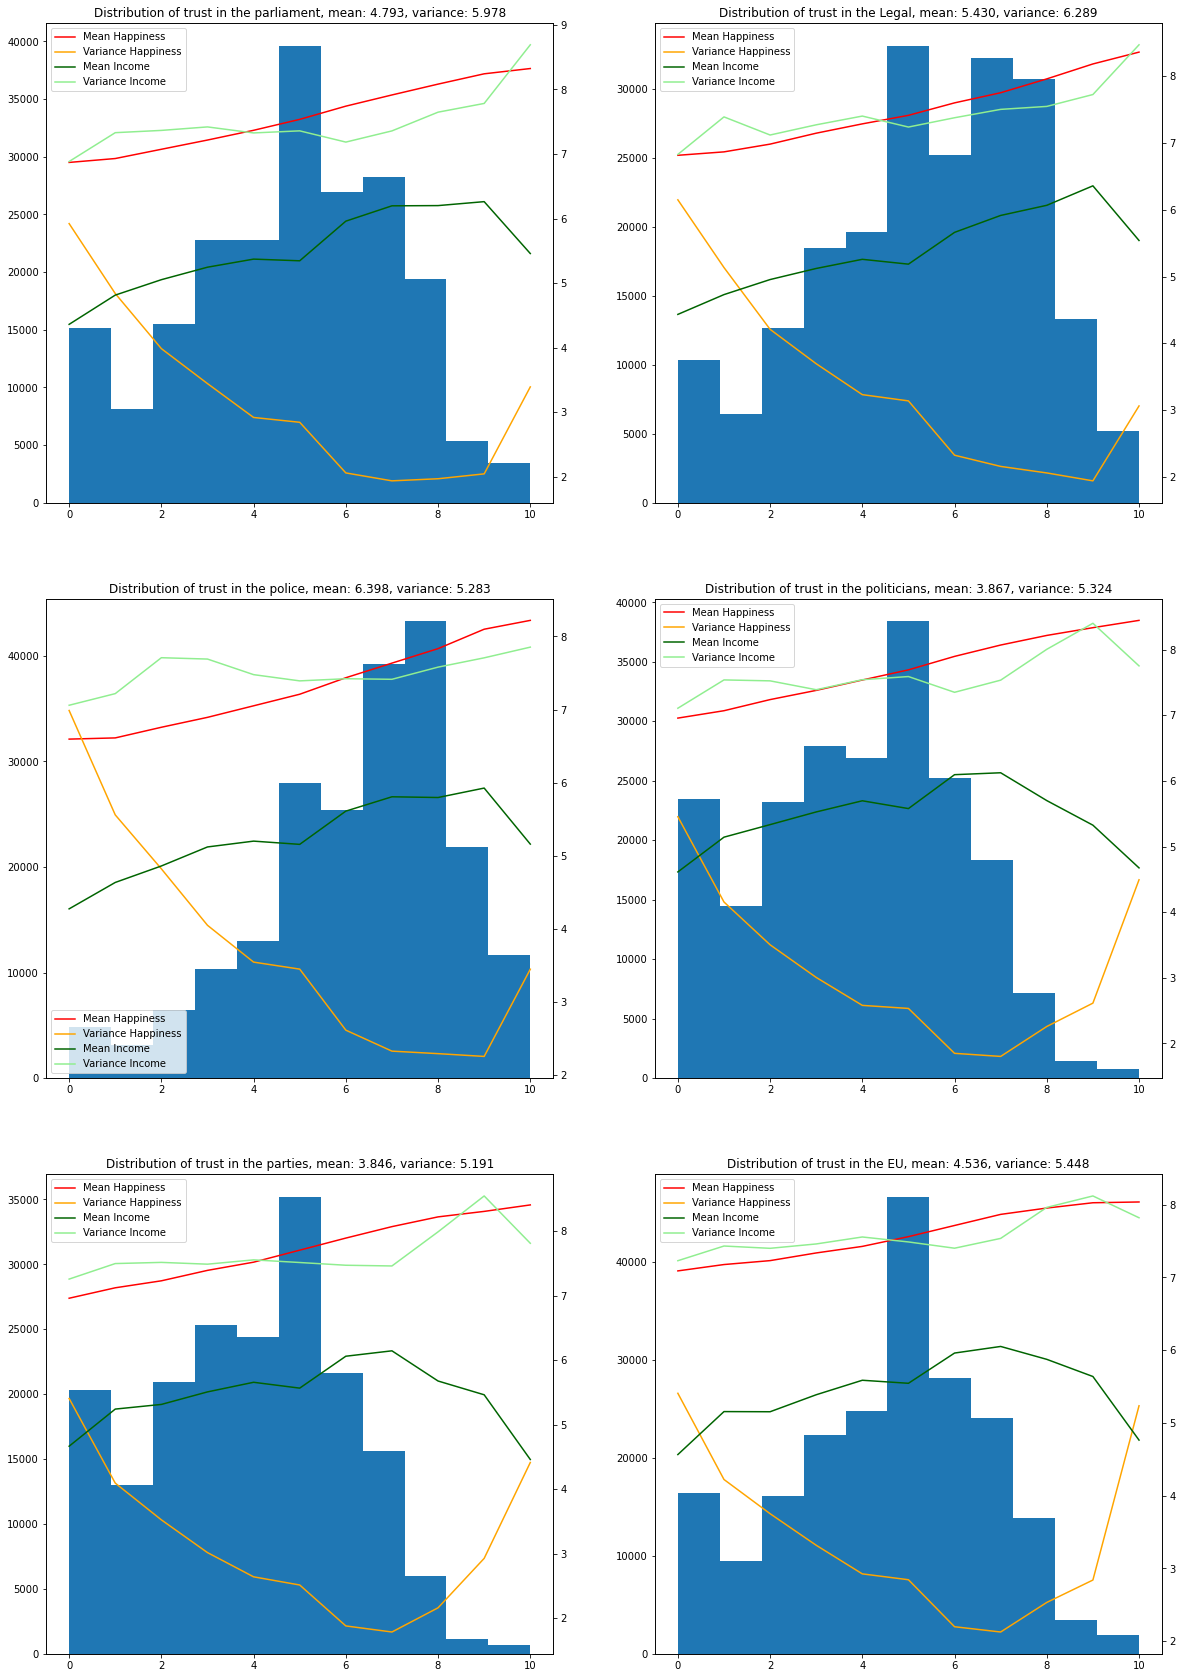

In [43]:
trust_categories = ['Trust parliament', 'Trust Legal', 'Trust police', 'Trust politicians', 'Trust parties', 'Trust EU']

# Plot different distributions

f, ax = plt.subplots(3, 2, sharey=False, figsize= [20,30])

# Get mean and variance for each income group:

trust_means = []
trust_variances = []

for i in range(len(trust_categories)):
    # Calculate mean and variance for each income group
    trust_means.append(ess_happy_trust[trust_categories[i]].mean())
    trust_variances.append(ess_happy_trust[trust_categories[i]].var())
    
    # Get mean and variance of happiness values for each trust level
    
    happy_mean = []
    happy_var = []
    income_mean = []
    income_var = []
    
    for j in range(11):
        happy_mean.append(ess_happy_trust[ess_happy_trust[trust_categories[i]] == j]['Happiness'].mean())
        happy_var.append(ess_happy_trust[ess_happy_trust[trust_categories[i]] == j]['Happiness'].var())
        income_mean.append(ess_trust_and_income_4_9[ess_trust_and_income_4_9[trust_categories[i]] == j]['Net income 4-9'].mean())
        income_var.append(ess_trust_and_income_4_9[ess_trust_and_income_4_9[trust_categories[i]] == j]['Net income 4-9'].var())
    
    # Plot data
    
    plot_row = int(i/2)
    plot_col = i%2    
    ax[plot_row, plot_col].hist(ess_happy_trust[trust_categories[i]], bins=11)
    ax2=ax[plot_row, plot_col].twinx()
    ax2.plot(range(11), happy_mean, label='Mean Happiness', color='red')
    ax2.plot(range(11), happy_var, label='Variance Happiness', color='orange')
    ax2.plot(range(11), income_mean, label='Mean Income', color='darkgreen')
    ax2.plot(range(11), income_var, label='Variance Income', color='lightgreen')
    ax2.set_title('Distribution of trust in the %s, mean: %.3f, variance: %.3f' %(trust_categories[i].split(' ')[1], trust_means[i], trust_variances[i]))
    ax2.legend()

What can be seen is, that the trust level is the lowest into politicans and parties. the parliament and EU do a little better, but in general it shows quite a big distrust into the political system, with an average below the mean scale value of 5. The legal system is doing a bit better, and best is the police. Nevertheless it seems to be quite concerning.

There also seems to be a significant relationship between happiness and the trust into official institutions. The happier people are, the more they seem to trust official institutions. The variance of happiness however is big on both ends, of the trust scale.

For parliament, police and legal system the same relation seems to be true for the net income, with a significant drop at the highest rank of trust. Although there the general number is rather low.
Interesting is though, that for parliament and parties, and also the EU, the average income of those who have the highest trust, drops within the upper third of the categories, for the first two even below of those with no trust at all. But still the total amount is rather low.

Next I will have a look at the relation between left and right wing and happiness and income

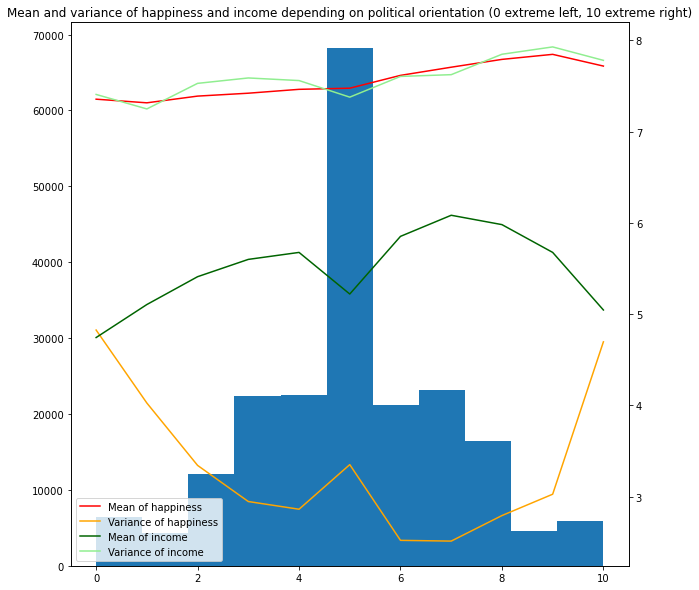

In [44]:
happy_mean = []
happy_var = []
income_mean = []
income_var = []

for i in range(11):
    happy_mean.append(ess_happy_trust[ess_happy_trust['Left Right'] == i]['Happiness'].mean())
    happy_var.append(ess_happy_trust[ess_happy_trust['Left Right'] == i]['Happiness'].var())
    income_mean.append(ess_trust_and_income_4_9[ess_trust_and_income_4_9['Left Right'] == i]['Net income 4-9'].mean())
    income_var.append(ess_trust_and_income_4_9[ess_trust_and_income_4_9['Left Right'] == i]['Net income 4-9'].var())

    
# Plot

fig1, ax1 = plt.subplots(1,1, figsize= [10,10])
ax1.hist(ess_happy_trust['Left Right'], bins=11)
ax2=ax1.twinx()
ax2.plot(range(11), happy_mean, label='Mean of happiness', color='red')
ax2.plot(range(11), happy_var, label='Variance of happiness', color='orange')
ax2.plot(range(11), income_mean, label='Mean of income', color='darkgreen')
ax2.plot(range(11), income_var, label='Variance of income', color='lightgreen')
ax2.set_title('Mean and variance of happiness and income depending on political orientation (0 extreme left, 10 extreme right)')
ax2.legend()

It looks like that people on the right wing have in average a bit higher income than on the left. Nevertheless on both extreme ends the average income drops a lot. Also that of those who seem to be on side at all have a lower average income than on slight left or right wing. In general the relation between left and right wing seems to be a lot more related to income than to happiness.

One last thing I want ot take a look at is the correlation between the GDP per capita and the trust into official institutions and politics. Also the happiness is plotted:

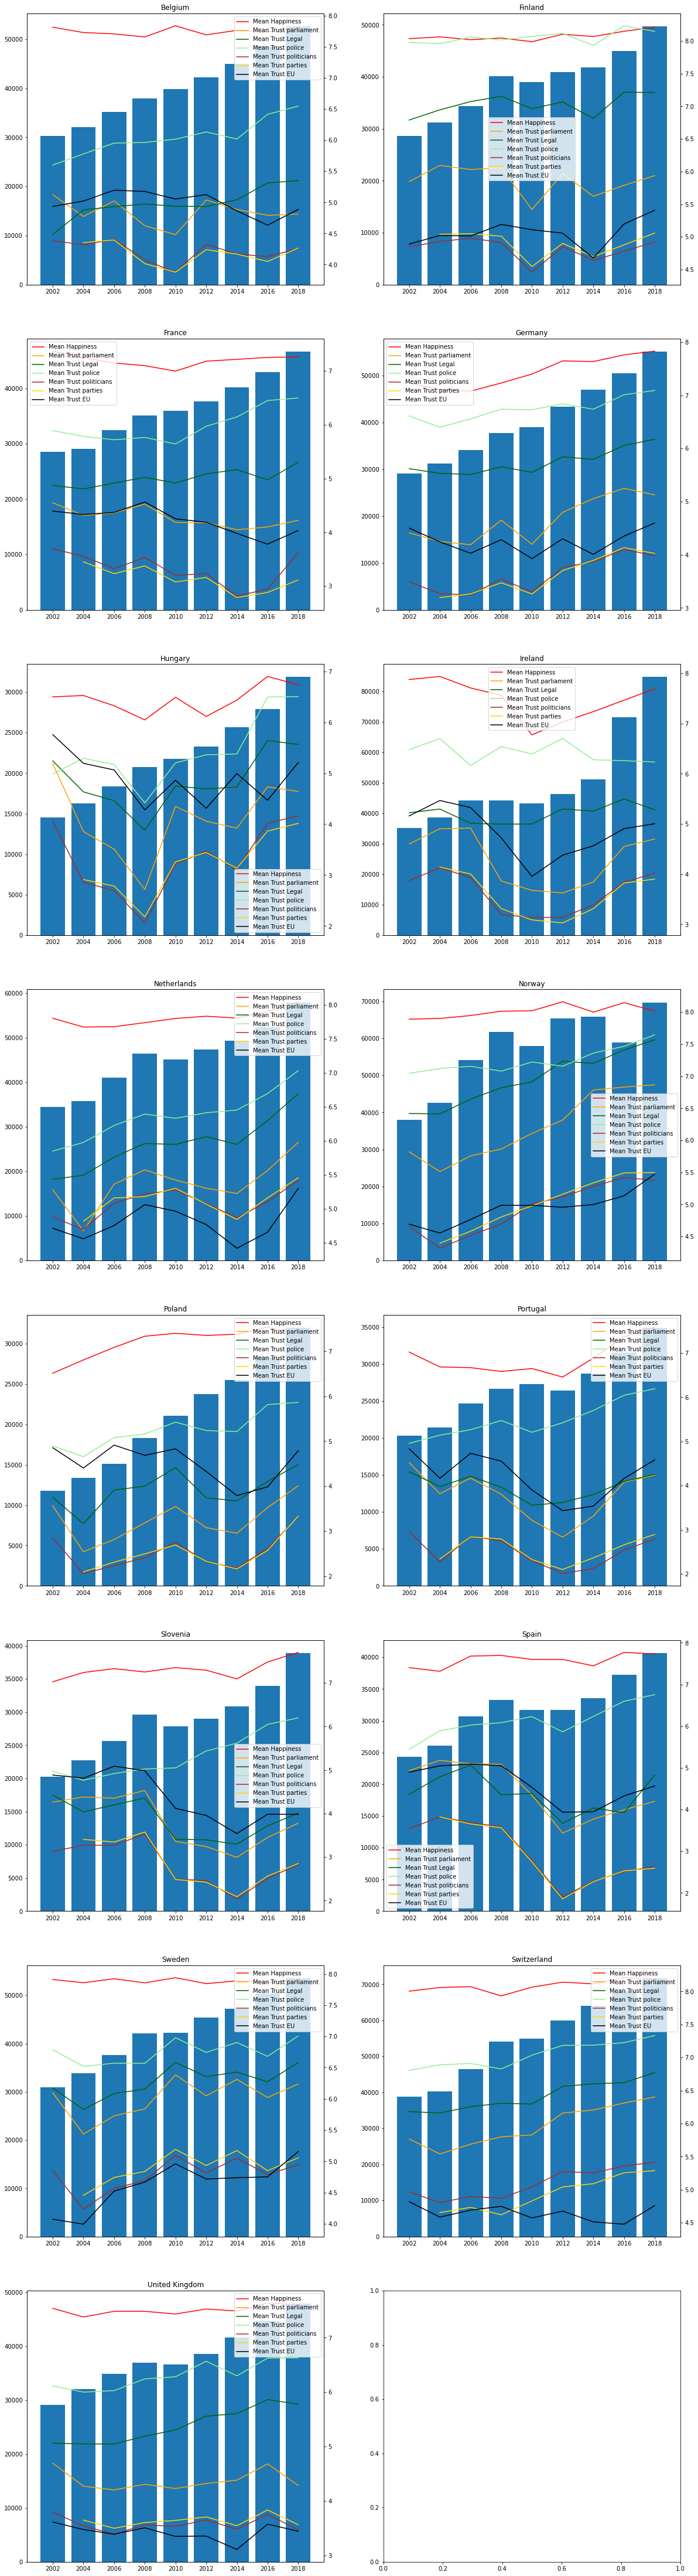

In [45]:
f, ax = plt.subplots(8, 2, sharey=False, figsize= [20,80])
relevant_years = ess_pp1['year'].unique()
gdp_two_years_cycle = gdp_data[gdp_data.index.isin(relevant_years)]

trust_categories = ['Trust parliament', 'Trust Legal', 'Trust police', 'Trust politicians', 'Trust parties', 'Trust EU']
for i in range(len(list_of_countries)):
    country = list_of_countries[i]
    mean_happ = []
    mean_trust_parliament = []
    mean_trust_politicians = []
    mean_trust_Legal = []
    mean_trust_parties = []
    mean_trust_police = []
    mean_trust_Eu = []
    for year in gdp_two_years_cycle.index:
        mean_happ.append(ess_happy_trust[(ess_happy_trust['year'] == year) & (ess_happy_trust['country'] == country)]['Happiness'].mean())
        mean_trust_parliament.append(ess_happy_trust[(ess_happy_trust['year'] == year) & (ess_happy_trust['country'] == country)]['Trust parliament'].mean())
        mean_trust_politicians.append(ess_happy_trust[(ess_happy_trust['year'] == year) & (ess_happy_trust['country'] == country)]['Trust politicians'].mean())
        mean_trust_Legal.append(ess_happy_trust[(ess_happy_trust['year'] == year) & (ess_happy_trust['country'] == country)]['Trust Legal'].mean())
        mean_trust_parties.append(ess_happy_trust[(ess_happy_trust['year'] == year) & (ess_happy_trust['country'] == country)]['Trust parties'].mean())
        mean_trust_police.append(ess_happy_trust[(ess_happy_trust['year'] == year) & (ess_happy_trust['country'] == country)]['Trust police'].mean())
        mean_trust_Eu.append(ess_happy_trust[(ess_happy_trust['year'] == year) & (ess_happy_trust['country'] == country)]['Trust EU'].mean())
        
    # Plot data
    
    plot_row = int(i/2)
    plot_col = i%2    
    ax[plot_row, plot_col].bar(gdp_two_years_cycle.index, gdp_two_years_cycle[country])
    ax2=ax[plot_row, plot_col].twinx()
    ax2.plot(gdp_two_years_cycle.index, mean_happ, label='Mean Happiness', color='red')
    ax2.plot(gdp_two_years_cycle.index, mean_trust_parliament, label='Mean Trust parliament', color='orange')
    ax2.plot(gdp_two_years_cycle.index, mean_trust_Legal, label='Mean Trust Legal', color='darkgreen')
    ax2.plot(gdp_two_years_cycle.index, mean_trust_police, label='Mean Trust police', color='lightgreen')
    ax2.plot(gdp_two_years_cycle.index, mean_trust_politicians, label='Mean Trust politicians', color='brown')
    ax2.plot(gdp_two_years_cycle.index, mean_trust_parties, label='Mean Trust parties', color='gold')
    ax2.plot(gdp_two_years_cycle.index, mean_trust_Eu, label='Mean Trust EU', color='black')
    ax2.set_title('%s'%country)
    ax2.legend()

What can be seen here is, that there is no general relation between trust in institutions. But as soon as the gdp per capita goes down, hence the economy is going bad, the trust in institutions goes down a lot, as can be seen for example in Portugal, Slovenia, Ireland and Finland. It can go down very quickly and takes a lot longer to regain the trust.

The interesting is though is, that although the trust goes down, that does not seem to affect the happiness, so people seem to distinguish quite a bit between econemy, trust in govenment and politics on the one hand and personal happiness on the other side.


# Conclusion

In general, people who trust the institutions like parliament police or legal system more, tend to be happier. The general trust level is not all to good. Also institutions like police, legal system and parliament are higher than in politicians and parties, which are really bad.

Another thing is, that a bad going econemy and crisis has a big influence on the trust in politics in general, but does not seem to have big correlation to personal happiness.
